# Augmented Dickey Fuller test

In [1]:
# necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

In [3]:
# reading excel file and storing it in a dataframe
df = pd.read_excel('/Users/janhavi/Downloads/Series_1.xlsx')
df.head()

,Time,Value
0,1,0.000000
1,2,-0.090263
2,3,0.749995
3,4,1.247887
4,5,0.131282


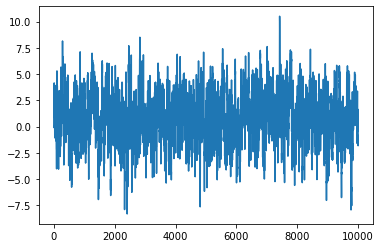

In [4]:
plt.plot(df['Value'])

In [6]:
X = df["Value"].values
result = adfuller(X)
result

(-22.18493022734871,
 0.0,
 0,
 9999,
 {'1%': -3.4310041633725734,
  '5%': -2.861829101294412,
  '10%': -2.566923883481157},
 28167.381318321917)

# Explaination

First data point: -22.18493022734871: Critical value of the data in your case

Second data point: 0.0: Probability that null hypothesis will not be rejected (p-value)

Third data point: 0: Number of lags used in regression to determine t-statistic. So there are no auto correlations going back to '0' periods here.

Forth data point: 9999: Number of observations used in the analysis.

Fifth data point: {'10%': -2.566923883481157, '1%': -3.4310041633725734, '5%': -2.861829101294412}: T values corresponding to adfuller test.

Since critical value -22.18<-3.4,-2.8,-2.5 (t-values at 1%,5%and 10% confidence intervals) 
null hypothesis is rejected and hence the time series is stationarity

In [8]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Hypothesis - Time Series is Stationary")
else:
    print ("Failed to Reject Hypothesis - Time Series is Non-Stationary")

ADF Statistic: -22.184930
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Reject Hypothesis - Time Series is Stationary


# Via code

In [14]:
# store values in diff_values
df["Diff_Value"] = df["Value"].diff()
diff_values = df["Diff_Value"].values

# remove NAN values
Y = diff_values[~np.isnan(diff_values)]

In [15]:
# drop the last value
ts_values_orig = df["Value"].values
ts_values = ts_values_orig[:-1]

In [16]:
X = sm.add_constant(ts_values)

In [12]:
model = sm.OLS(Y,X)
results = model.fit()

In [13]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     492.2
Date:                Sat, 06 Nov 2021   Prob (F-statistic):          1.74e-106
Time:                        10:38:23   Log-Likelihood:                -14130.
No. Observations:                9999   AIC:                         2.826e+04
Df Residuals:                    9997   BIC:                         2.828e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0659      0.010      6.347      0.0

In [17]:
results.tvalues[1]

-22.184930227348705

We get the same result as before